# EDA

In this notebook, some EDA will be performed on each sets of data for the subreddits.

# Imports:

In [435]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Loading Datasets:

In [436]:
# Reading breaking bad subreddit dataset
bb_df = pd.read_csv('data/breakingbad.csv')
bb_df['subreddit'] = bb_df['subreddit'].map({'breakingbad': 0, 'betterCallSaul': 1})
bb_df = bb_df.rename(columns={'selftext': 'post'})

bb_df.drop(columns = 'Unnamed: 0', inplace= True)
bb_df.head()

,subreddit,post,title
0,0,[removed],If only
1,0,"Ok so the show itself is a “scary” and violent one. I finished season 4 just now and its clear by now. \n\nI only have one season left, but is there any episodes that include bloody deaths in season 5? \n\nThe acid scenes were very gross but i could tolerate it, but the box cutter scene really scared me and i had to skip ahead a few seconds.",I’m squeamish/gets scared easily - anyone wanna warn me about any episodes?
2,0,"If Hank simply watched security footage from the motel, he would find that Jesse in fact, was not there the last three days with Wendy.",Motels didn't have cameras back then?
3,0,[removed],Walter Jr outfit in this scene:
4,0,You can’t get near him and have to lay low. What’s your plan to take out via before he takes out you? And you also can’t just make a different type of bomb. That’s cheating.,"If you were Walt and the store was out of Etch A Sketches, how would you take out Gus?"


In [437]:
# Reading better call saul subreddit dataset
bcs_df = pd.read_csv('data/bettercallsaul.csv')
bcs_df['subreddit'] = bcs_df['subreddit'].map({'breakingbad': 0, 'betterCallSaul': 1})
bcs_df = bcs_df.rename(columns={'selftext': 'post'})
bcs_df.drop(columns = 'Unnamed: 0', inplace= True)


In [438]:
# Reading both breaking bad and better call saul subreddits as one dataset
df = pd.read_csv('data/subreddits.csv')
df['subreddit'] = df['subreddit'].map({'breakingbad': 0, 'betterCallSaul': 1})
df = df.rename(columns={'selftext': 'post'})
df.drop(columns = 'Unnamed: 0', inplace= True)


df.shape
df.head()

,subreddit,post,title
0,1,"All you people say ""oh boohoo Jimmy, boohoohoo Jimmy"" as if Jimmy isn't an adult that can make his own choices.\n\nLemme ask you something. If Jimmy really isn't a terrible person, how come in S6E8, he asks Lalo to send Kim to Gus' house? Gus doesn't like being disturbed during dinner. What if he shoots Kim before she can shoot him? Also, what if Kim crashes her car along the way to Gus' house...",Stop denying it. Chuck was right
1,1,"We all know that the excavation happened in the laundry site at the center of Abq. But in S4&amp; S5 of BCS, when Lalo was investigating Gus’s secret, we see the place was in the middle of nowhere, and when Gus showed Lalo the fake project at that site he said it’s a chicken chiller, not laundry. \n\nSeems to me this is a plot hole, or am I missing something?",Where exactly is the excavation project
2,1,"Mine is probably Dedicado a Max. It's not horrible by any means, but I didn't really care for the Mike in Mexico plot.",Least favorite episode?
3,1,NaN,Better SUCK Chuck (Official Music Video) pls check out my yt 🙂
4,1,NaN,Salamanca Brothers


# EDA on Breaking Bad Titles

After checking the missing values, I noticed most of the posts are only images and don't have any texts in the body. Therefore, I decided to move on with the titles of each post.

In [439]:
df.isna().sum()

subreddit       0
post         2503
title           0
dtype: int64

In [440]:
# Function to count words in each title:
def word_count(title):
    word_count = 0
    is_in_word = False
    for char in title:
        if char in ' \t\n.!,:;/?\\()"':
            is_in_word = False
        else:
            if not is_in_word:
                word_count += 1
                is_in_word = True

    return (word_count)

In [441]:
# Adding a column showing number of words in each title
bb_df['title_length'] = [word_count(comment) for comment in bb_df['title']]
bb_df = bb_df.loc[bb_df['title_length'] > 0, :]
bb_df.shape

(2495, 4)

# Longest and Shortest Titles in Breaking Bad Subreddits

In [442]:
# Longest Titles
five_longest_titles_bb = bb_df.sort_values(by = 'title_length', ascending = False).head()
print(five_longest_titles_bb['title'])

813    Hank Schrader… I really liked Hank in seasons 1 and 2 especially outside of his work as he acted and well was a badass… after the tortuga incident and after the fake phone call about Marie we really got to see that Hank was not the perfect hero we thought he was which I dislike… what y’all think?
812           Most of the cast still look roughly the same age as when they left breaking bad with some exceptions however… Bob Odenkirk has really visibly aged over the past few years… around the time of BCS season 1 he looks good old Saul but by the time season 2 starts you can tell he has aged a lot…
828    Breaking bad: it amazes me how Skyler teared Walt down for cooking meth, then ironically falls for Ted who is stealing from his company. Skyler then plays one foot in one out with the cops and attempts to punish Walt every way possible. let this be a lesson a woman never wants to see a man happy.
707             This is Gus Fring on his first appearance in Breaking Bad. He was wea

In [443]:
# Shortest Titles
five_shortest_titles_bb = bb_df.sort_values(by = 'title_length').head(10)
print(five_shortest_titles_bb['title'])

1247       Question?
1081             Boo
1170           Wtf?!
1208           Lydia
1220    Nostalgic...
1240            Meme
1266         meaning
1309            What
1313            lofi
1349         Gustavo
Name: title, dtype: object


# Distribution of Title Length for Breaking Bad Subreddits

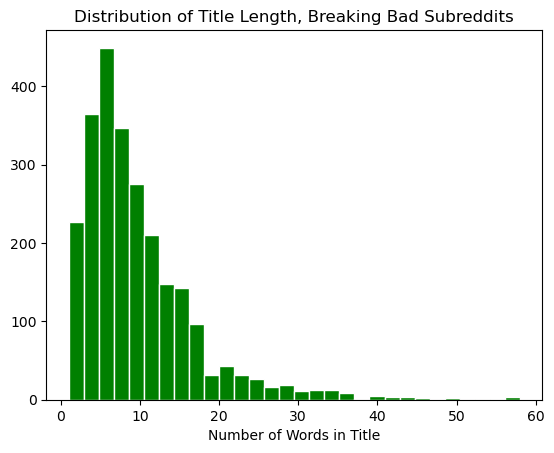

In [444]:
plt.hist(bb_df['title_length'], bins = 30, color = 'green', edgecolor = 'white')
plt.xlabel('Number of Words in Title')
plt.title('Distribution of Title Length, Breaking Bad Subreddits');
plt.savefig('image/bbdist.png')

As we can see in the above plot, the distribution of title length in Breaking Bad subreddit is right skewed. Majority of the title texts are around 10-words long and titles with more than 20 words are rare.

# EDA on Better Call Saul Posts

In [445]:
bcs_df.isna().sum()
bcs_df.shape

(2496, 3)

In [446]:
# Adding a column showing number of words in each post
bcs_df['title_length'] = [word_count(comment) for comment in bcs_df['title']]
bcs_df = bcs_df.loc[bcs_df['title_length'] > 0, :]
bcs_df.shape

(2494, 4)

# Longest and Shortest Posts in Better Call Saul Subreddits

In [447]:
# Longest Titles
five_longest_titles = bcs_df.sort_values(by = 'title_length', ascending = False).head()
print(five_longest_titles['title'])

2261    $10,000(USD) slab of COCOBOLO~ It may not be anything interesting to some, I’ve just personally never seen an 8.5’ L (101”) x 20” W &amp; 4/4 to 5/4 thick, slab of ANYTHING go for $10,000 … wanted to hear your thoughts. . . Is it priced right?? … would you buy this piece? What makes it worth $10K?
1448            Called the free will Baptist church from the show cause I was curious. Just rang and then hung up. But today, a couple days later, I got a call back? It rang and almost immediately hung up and I couldn’t answer it. I know it was an Easter egg for a while. Does someone still own the number?
1185     i was watching the wire season 3 episode 1 and the final shot felt familiar. For comparison, the final shot of BCS 3.1 as well. Not sure if this is intentional but both shots being the end of the same episode sequence, 3.1, it seems plausible. I hadn't heard of any prior wire connections for BCS.
2146            What always struck me as interesting about this scene is the gu

In [448]:
# Shortest Titles
five_shortest_titles_bcs = bcs_df.sort_values(by = 'title_length').head()
print(five_shortest_titles_bcs['title'])

1049             🗿
2050         Lmfao
764     Confession
886           mike
1885             😅
Name: title, dtype: object


# Distribution of Title Length for Better Call Saul Subreddits

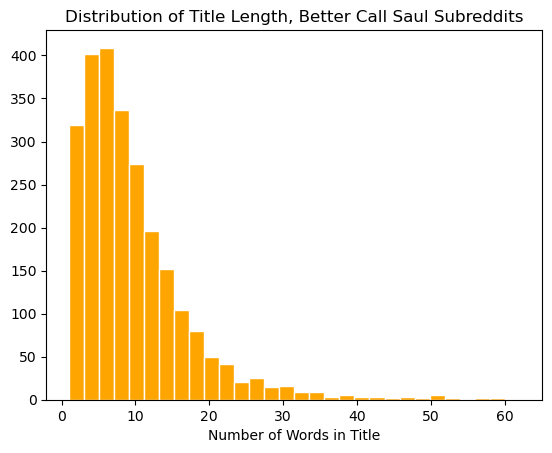

In [449]:
plt.hist(bcs_df['title_length'], bins = 30, color = 'orange', edgecolor = 'white')
plt.xlabel('Number of Words in Title')
plt.title('Distribution of Title Length, Better Call Saul Subreddits');
plt.savefig('image/bcsdist.png')

Same as Breaking Bad subreddit, the distribution of title length is right skewed and there is a low tendency to write titles with more than 20 words.

# Distribution of Post Length for Both Subreddits

In [450]:
df['title_length'] = [word_count(comment) for comment in df['title']]
df.head()

,subreddit,post,title,title_length
0,1,"All you people say ""oh boohoo Jimmy, boohoohoo Jimmy"" as if Jimmy isn't an adult that can make his own choices.\n\nLemme ask you something. If Jimmy really isn't a terrible person, how come in S6E8, he asks Lalo to send Kim to Gus' house? Gus doesn't like being disturbed during dinner. What if he shoots Kim before she can shoot him? Also, what if Kim crashes her car along the way to Gus' house...",Stop denying it. Chuck was right,6
1,1,"We all know that the excavation happened in the laundry site at the center of Abq. But in S4&amp; S5 of BCS, when Lalo was investigating Gus’s secret, we see the place was in the middle of nowhere, and when Gus showed Lalo the fake project at that site he said it’s a chicken chiller, not laundry. \n\nSeems to me this is a plot hole, or am I missing something?",Where exactly is the excavation project,6
2,1,"Mine is probably Dedicado a Max. It's not horrible by any means, but I didn't really care for the Mike in Mexico plot.",Least favorite episode?,3
3,1,NaN,Better SUCK Chuck (Official Music Video) pls check out my yt 🙂,12
4,1,NaN,Salamanca Brothers,2


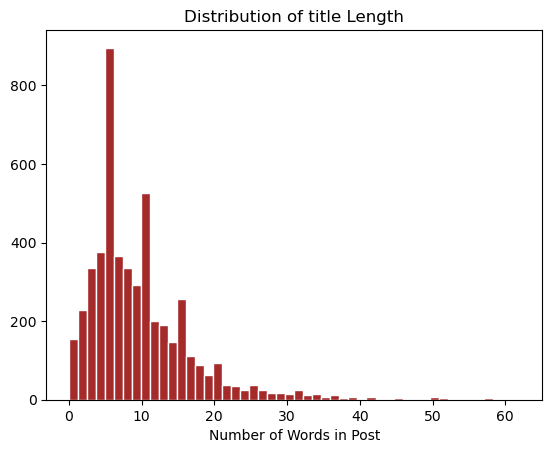

In [451]:
plt.hist(df['title_length'], bins = 50, color = 'brown', edgecolor = 'white')
plt.xlabel('Number of Words in Post')
plt.title('Distribution of title Length');
plt.savefig('image/bothdist.png')

# Positive & Negative words

Here, I have used a dictionary of positive and negative words to perform the sentimental analysis on each post title for each subreddit.

In [452]:
# source: https://github.com/shekhargulati/sentiment-analysis-python
negative_words = set(pd.read_csv('data/negative-words.txt')['words'])
positive_words = set(pd.read_csv('data/positive-words.txt')['words'])

In [453]:
len(positive_words)

2006

In [454]:
len(negative_words)

4774

In [455]:
# Function to classify titles as having positive or negative emotion.
# This function is adapted from Lesson NLP I, Sentimental Analysis
def simple_sentiment(text):
    # Normalize input text
    tokenizer = RegexpTokenizer(r'\w+')  
    tokens = tokenizer.tokenize(str(text).lower()) 
    ps = PorterStemmer()
    stemmed_words = [ps.stem(i) for i in tokens]
    
   # Count "positive" and "negative" sentimented words.
    pos_count = len([i for i in stemmed_words if i in positive_words])
    neg_count = len([i for i in stemmed_words if i in negative_words])
    
    # Calculate some sentiment
    return {"positive": pos_count / (len(tokens)+1),
            "negative": neg_count / (len(tokens)+1)}


In [456]:
bb_pos_neg = [simple_sentiment(title) for title in bb_df['title']]

In [457]:
bb_pos_neg_df = bb_df[['title']].apply(simple_sentiment, axis=1, result_type="expand")

In [458]:
bb_pos_neg_df.head()

,positive,negative
0,0.0,0.125000
1,0.0,0.105263
2,0.0,0.076923
3,0.0,0.083333
4,0.0,0.040000


In [459]:
bcs_pos_neg = [simple_sentiment(title) for title in bcs_df['title']]

In [460]:
bcs_pos_neg_df = bcs_df[['title']].apply(simple_sentiment, axis=1, result_type="expand")

In [461]:
bcs_pos_neg_df.head()

,positive,negative
0,0.083333,0.083333
1,0.000000,0.083333
2,0.000000,0.111111
3,0.058824,0.117647
4,0.000000,0.125000


In [462]:
bcs_pos_neg_df['subreddit'] = 'BetterCallSaul'

In [463]:
bb_pos_neg_df['subreddit'] = 'BreakingBad'

In [464]:
bb_pos_neg_df.mean()

/var/folders/cb/7tm32xh579bd23nj5kz1sydc0000gp/T/ipykernel_2723/4074726826.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bb_pos_neg_df.mean()


positive    0.013425
negative    0.089047
dtype: float64

In [465]:
new_df = pd.concat([bb_pos_neg_df, bcs_pos_neg_df], axis = 0)

In [466]:
new_df.head()

,positive,negative,subreddit
0,0.0,0.125000,BreakingBad
1,0.0,0.105263,BreakingBad
2,0.0,0.076923,BreakingBad
3,0.0,0.083333,BreakingBad
4,0.0,0.040000,BreakingBad


In [467]:
a = new_df.groupby('subreddit').mean().reset_index()

In [468]:
a.head()

,subreddit,positive,negative
0,BetterCallSaul,0.020521,0.084570
1,BreakingBad,0.013425,0.089047


In [469]:
b = a.melt(id_vars=["subreddit"], var_name="sentiment", value_name="word_percent")

In [470]:
b

,subreddit,sentiment,word_percent
0,BetterCallSaul,positive,0.020521
1,BreakingBad,positive,0.013425
2,BetterCallSaul,negative,0.084570
3,BreakingBad,negative,0.089047


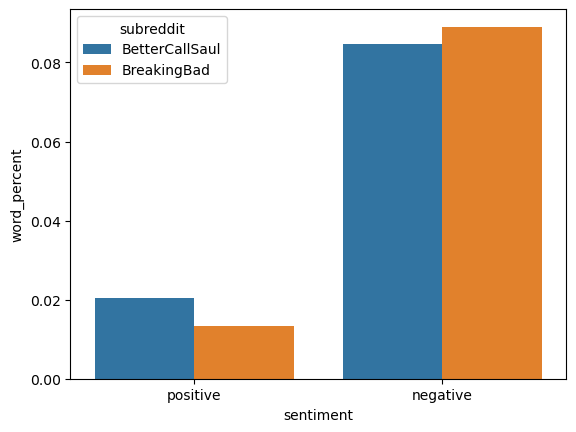

In [471]:
sns.barplot(data = b, 
           x = "sentiment",
           y = "word_percent",
           hue = 'subreddit');
plt.savefig('image/setiment.png')

It appears that, on average, the titles from the Better Call Saul subreddit contain fewer negative words and more positive words than those from the Breaking Bad subreddit.

Now, we move on to the NLP and modeling in the next two notebooks.